In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 200
sns.set()

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
raw = pd.read_csv('data_clean.csv')
raw.fillna(0, inplace=True)
raw['Participant_ID'] = raw['Participant_ID'].astype(int).astype(str)
raw = raw[raw['Participant_ID'] != '0']
raw.head()

,Participant_ID,Delay,"Response(N(no response) / C(correct response) / W(wrong response)/ U(sorry, I can't understand))",Talk_Type,Rounds No. of this talk,Repetition,rounds,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9
0,21034,2.0,N,S,1.1,2.0,3.0,Somewhat likely,Good,Good,SoModerately effectivemewhat satisfied,Moderately effective,Somewhat satisfied,Extremely satisfied,18-23,Female
1,21034,4.0,N,S,1.2,0.0,0.0,0,0,0,0,0,0,0,0,0
2,21034,0.0,C,S,1.3,0.0,0.0,0,0,0,0,0,0,0,0,0
3,21034,0.0,N,S,2.1,5.0,9.0,0,0,0,0,0,0,0,0,0
4,21034,0.0,N,S,2.2,0.0,0.0,0,0,0,0,0,0,0,0,0


In [11]:
pp_id = np.unique(raw['Participant_ID'])
before_wifi_id = ['21034', '21172', '18319']
after_wifi_id = [i for i in pp_id if i not in before_wifi_id]
print(len(pp_id), len(before_wifi_id), len(after_wifi_id))

19 3 16


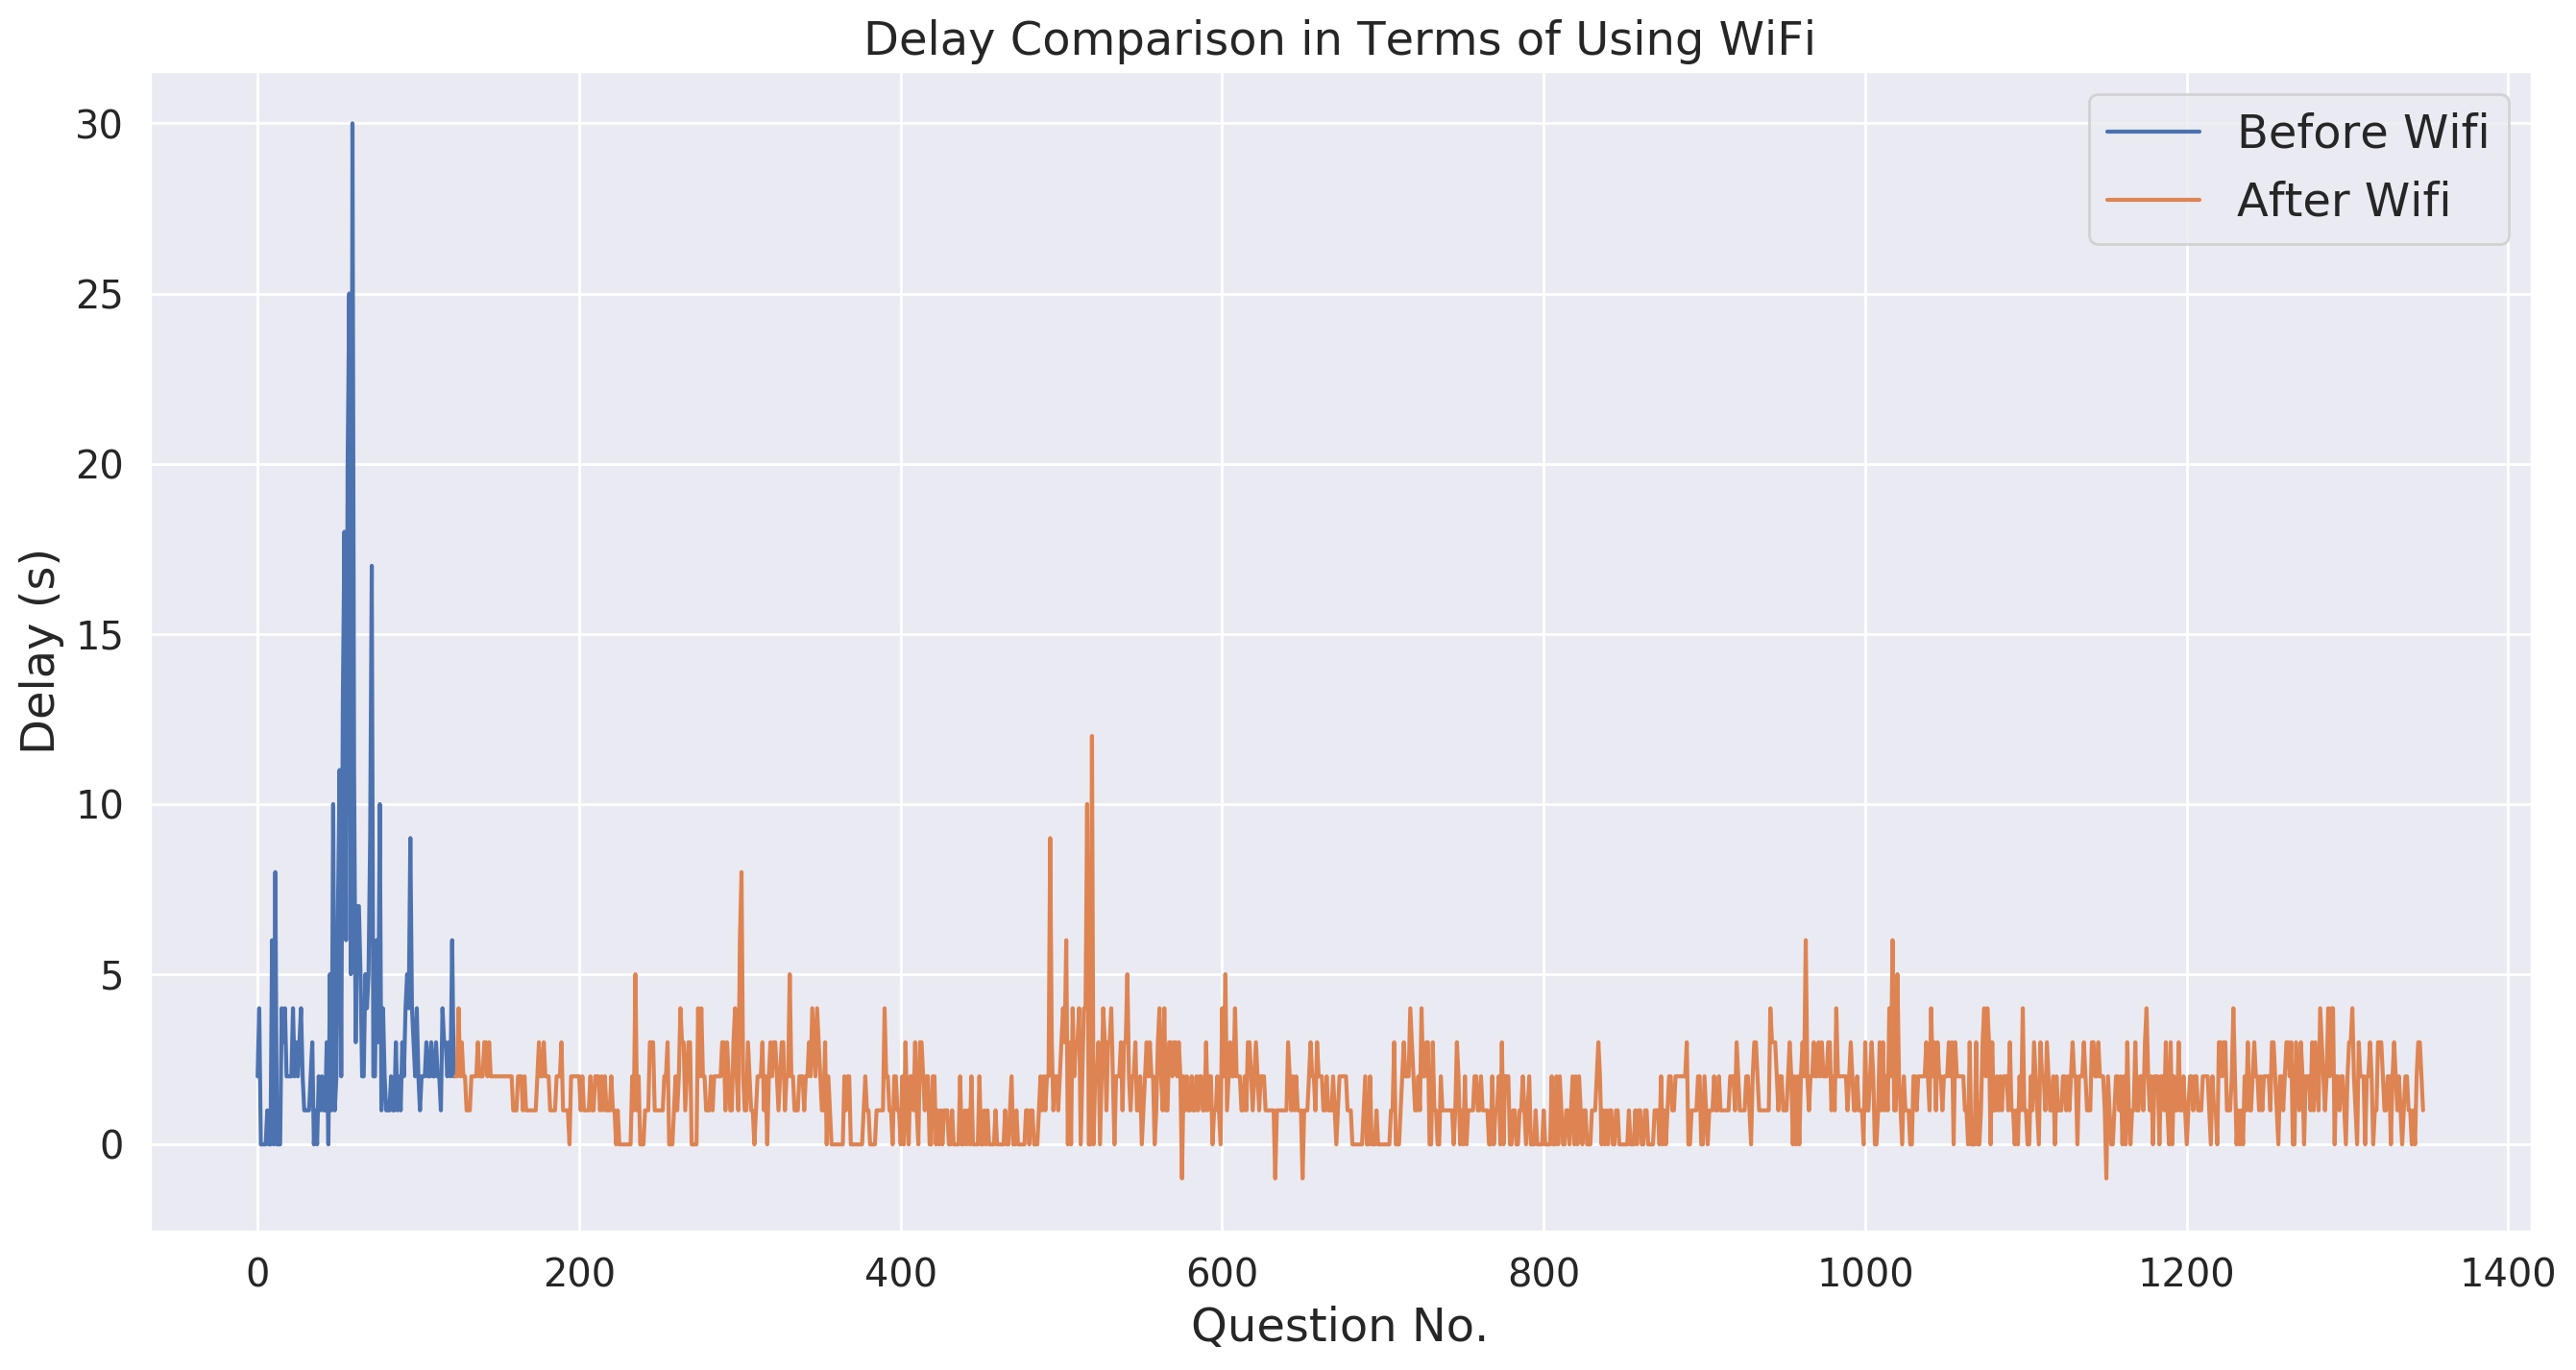

In [12]:
### Difference in terms of WiFi
before_wifi_data = raw[np.isin(raw['Participant_ID'], before_wifi_id)]
after_wifi_data = raw[np.isin(raw['Participant_ID'], after_wifi_id)]
plt.plot(range(len(before_wifi_data)), before_wifi_data['Delay'], label='Before Wifi')
plt.plot(range(len(before_wifi_data), len(before_wifi_data)+len(after_wifi_data)), after_wifi_data['Delay'], label='After Wifi')
plt.legend(fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.xlabel('Question No.', fontsize = 'x-large')
plt.ylabel('Delay (s)', fontsize = 'x-large')
plt.title('Delay Comparison in Terms of Using WiFi', fontsize = 'x-large')
plt.show()

In [13]:
survey = pd.read_csv('survey.csv') 
comment = list(survey.columns)
survey.columns = ['Q'+str(i) for i in range(1, 11)] + ['Time']
survey.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Time
0,21034,Somewhat likely,Good,Good,Moderately effective,Moderately effective,Somewhat satisfied,Extremely satisfied,18-23,Female,2019-04-15 13:24:11
1,21172,Somewhat likely,Average,Good,Moderately effective,Very effective,Somewhat dissatisfied,Somewhat satisfied,18-23,Female,2019-04-15 14:27:33
2,18319,Neither likely nor unlikely,Average,Average,Slightly effective,Slightly effective,Somewhat satisfied,Neither satisfied nor dissatisfied,18-23,Female,2019-04-15 15:11:05
3,20737,Somewhat likely,Poor,Excellent,Slightly effective,Moderately effective,Somewhat dissatisfied,Somewhat satisfied,18-23,Male,2019-04-16 13:28:04
4,20896,Extremely likely,Good,Good,Very effective,Extremely effective,Somewhat satisfied,Extremely satisfied,18-23,Female,2019-04-16 14:24:47


In [14]:
smartness = {'Terrible': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5}
effectivess = {'Not effective at all': 1, 'Slightly effective': 2, 'Moderately effective': 3, 
               'Very effective': 4, 'Extremely effective': 5}
satisfaction = {'Extremely dissatisfied': 1, 'Somewhat dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3,
                'Somewhat satisfied': 4, 'Extremely satisfied': 5}

In [15]:
survey['Q3'] = [smartness[i] for i in survey['Q3']]
survey['Q4'] = [smartness[i] for i in survey['Q4']]
survey['Q5'] = [effectivess[i] for i in survey['Q5']]
survey['Q6'] = [effectivess[i] for i in survey['Q6']]
survey['Q7'] = [satisfaction[i] for i in survey['Q7']]
survey['Q8'] = [satisfaction[i] for i in survey['Q8']]
survey['Wifi'] = list(np.zeros(3).astype(int)) + list(np.ones(16).astype(int))
survey['Time'] = pd.to_datetime(survey['Time']).dt.time
survey.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Time,Wifi
0,21034,Somewhat likely,4,4,3,3,4,5,18-23,Female,13:24:11,0
1,21172,Somewhat likely,3,4,3,4,2,4,18-23,Female,14:27:33,0
2,18319,Neither likely nor unlikely,3,3,2,2,4,3,18-23,Female,15:11:05,0
3,20737,Somewhat likely,2,5,2,3,2,4,18-23,Male,13:28:04,1
4,20896,Extremely likely,4,4,4,5,4,5,18-23,Female,14:24:47,1


In [16]:
survey_social = survey[['Q1', 'Q3', 'Q5', 'Q7', 'Time', 'Wifi']]
survey_task = survey[['Q1', 'Q4', 'Q6', 'Q8', 'Time', 'Wifi']]

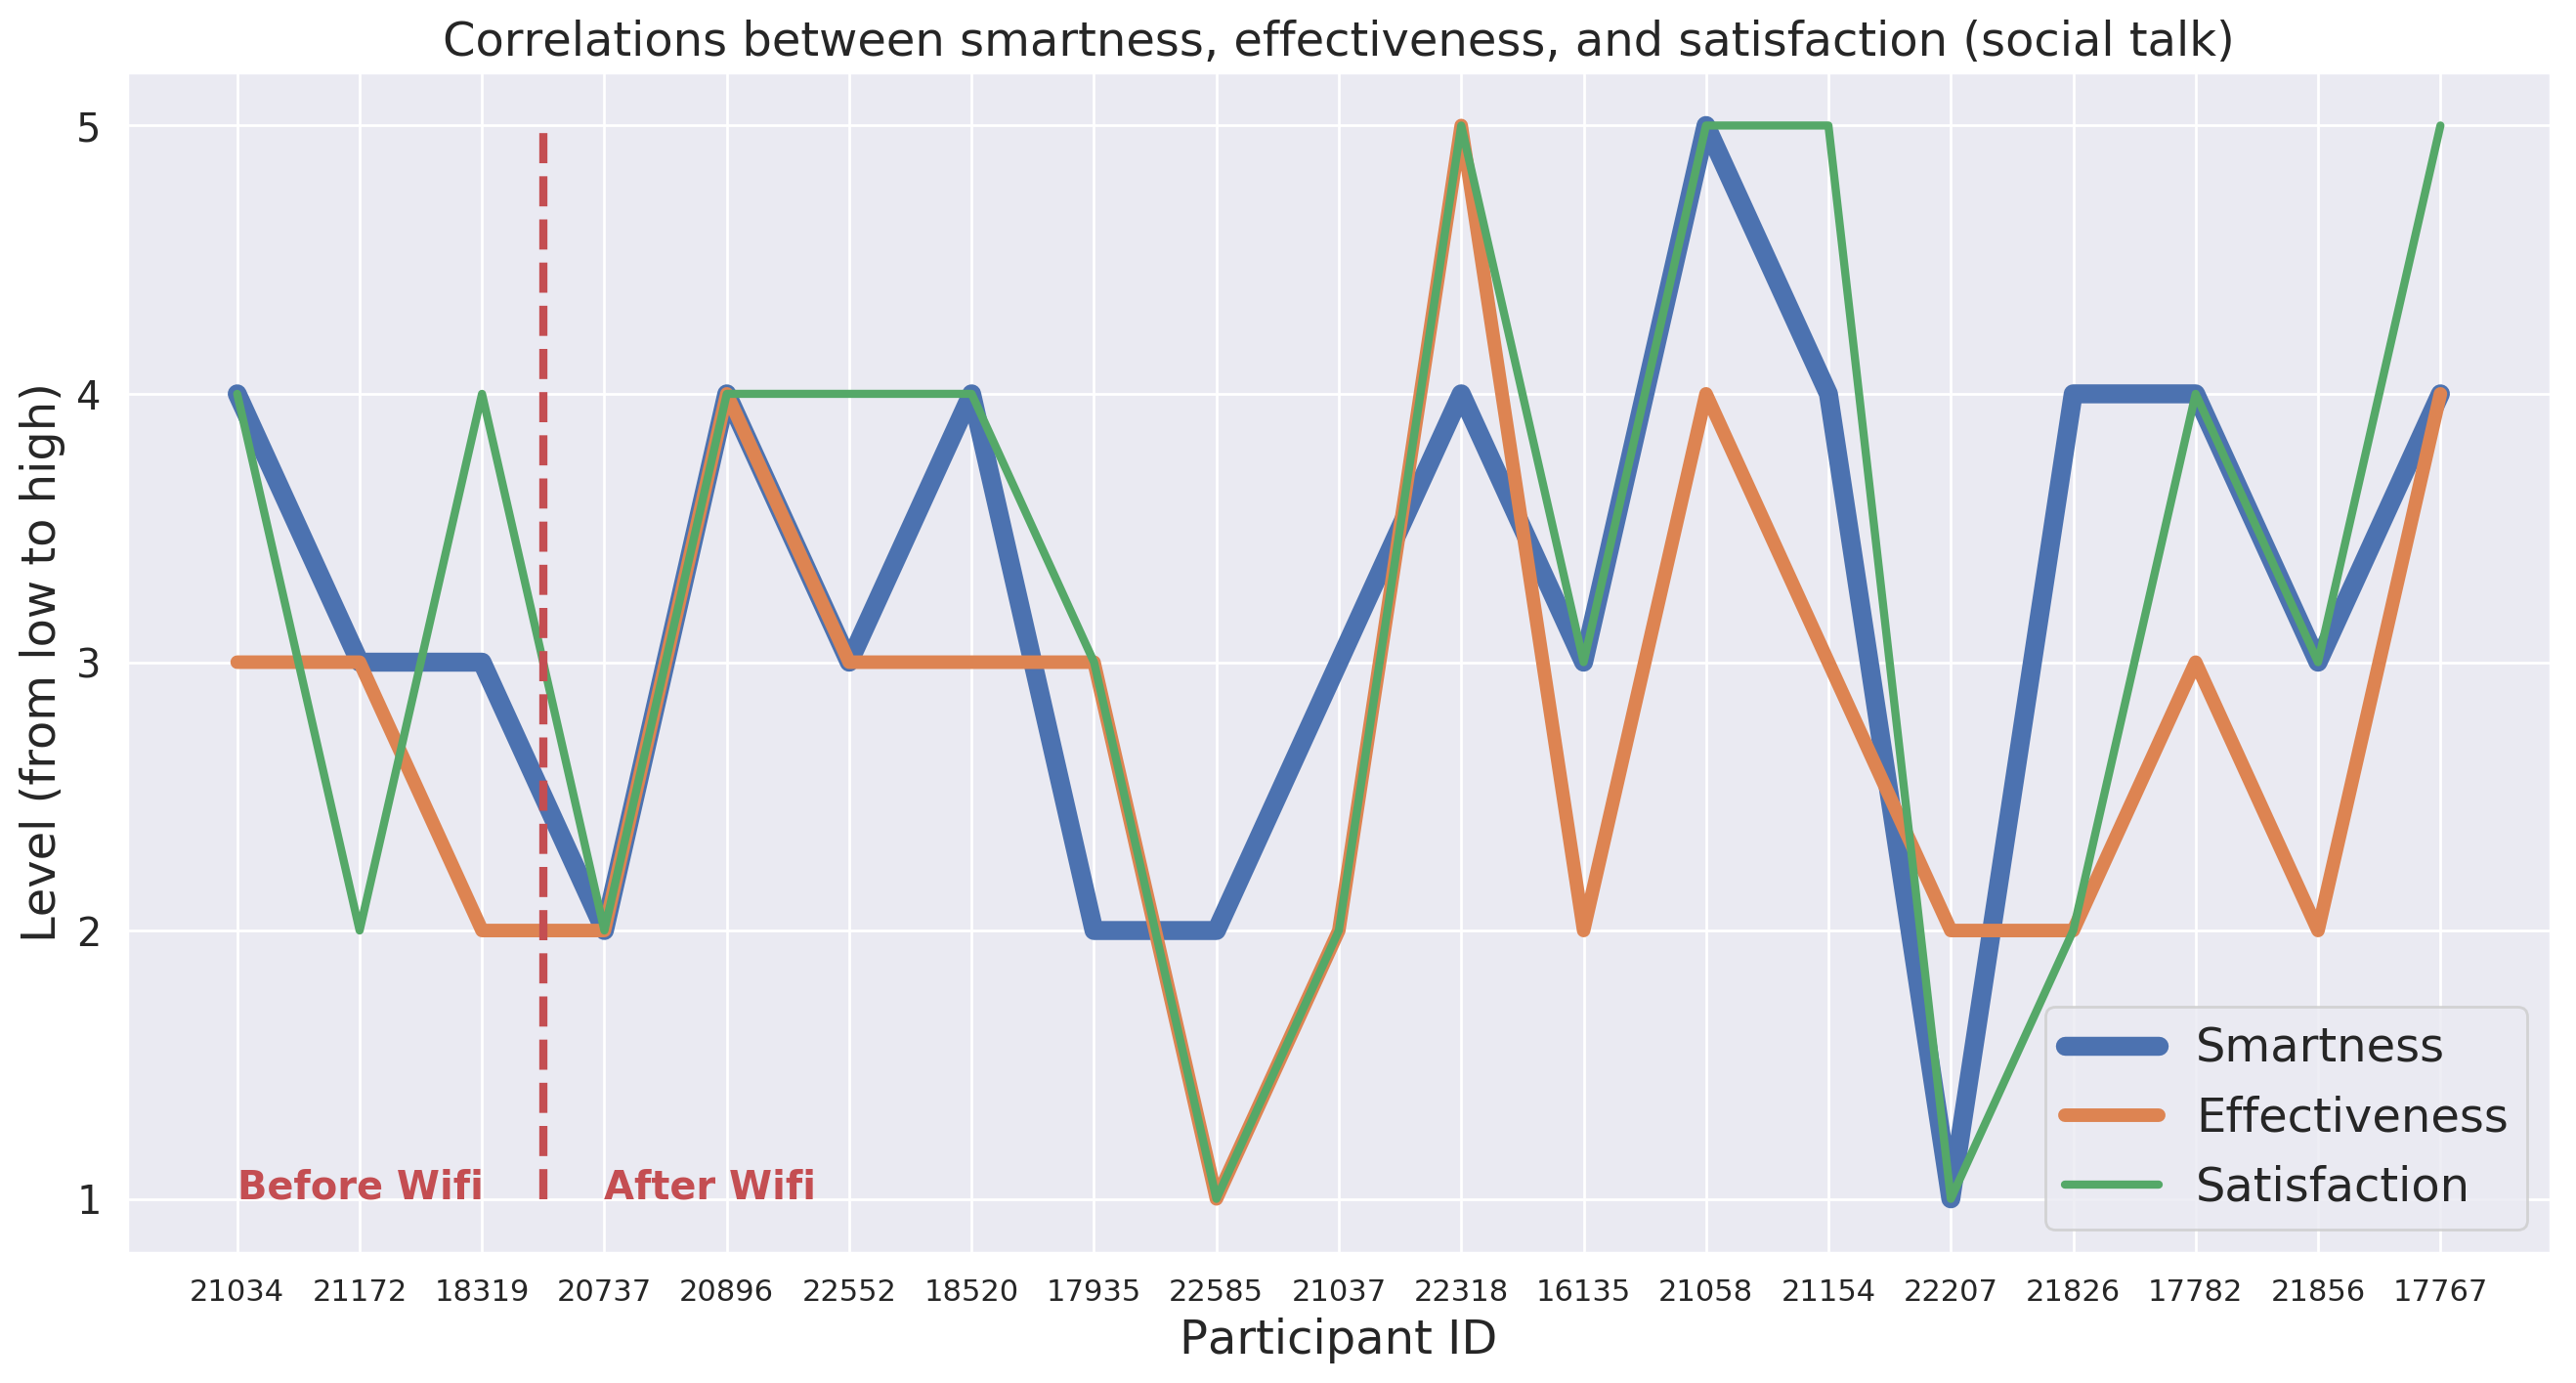

In [17]:
# social talk correlations
plt.plot(range(len(survey_social)), survey_social['Q3'], label='Smartness', linewidth=7)
plt.plot(range(len(survey_social)), survey_social['Q5'], label='Effectiveness', linewidth=5)
plt.plot(range(len(survey_social)), survey_social['Q7'], label='Satisfaction', linewidth=3)
plt.plot([2.5, 2.5], [1, 5], linestyle='dashed', linewidth=3) 
plt.legend(fontsize = 'x-large')
plt.xticks(range(19), survey_social['Q1'])
plt.yticks([1, 2, 3, 4, 5], fontsize = 'large')
plt.xlabel('Participant ID', fontsize = 'x-large')
plt.ylabel('Level (from low to high)', fontsize = 'x-large')
plt.title('Correlations between smartness, effectiveness, and satisfaction (social talk)', fontsize = 'x-large')
plt.text(0, 1, 'Before Wifi', fontsize = 'large', weight = 'bold', color = 'r')
plt.text(3, 1, 'After Wifi', fontsize = 'large', weight = 'bold', color = 'r')
plt.show()

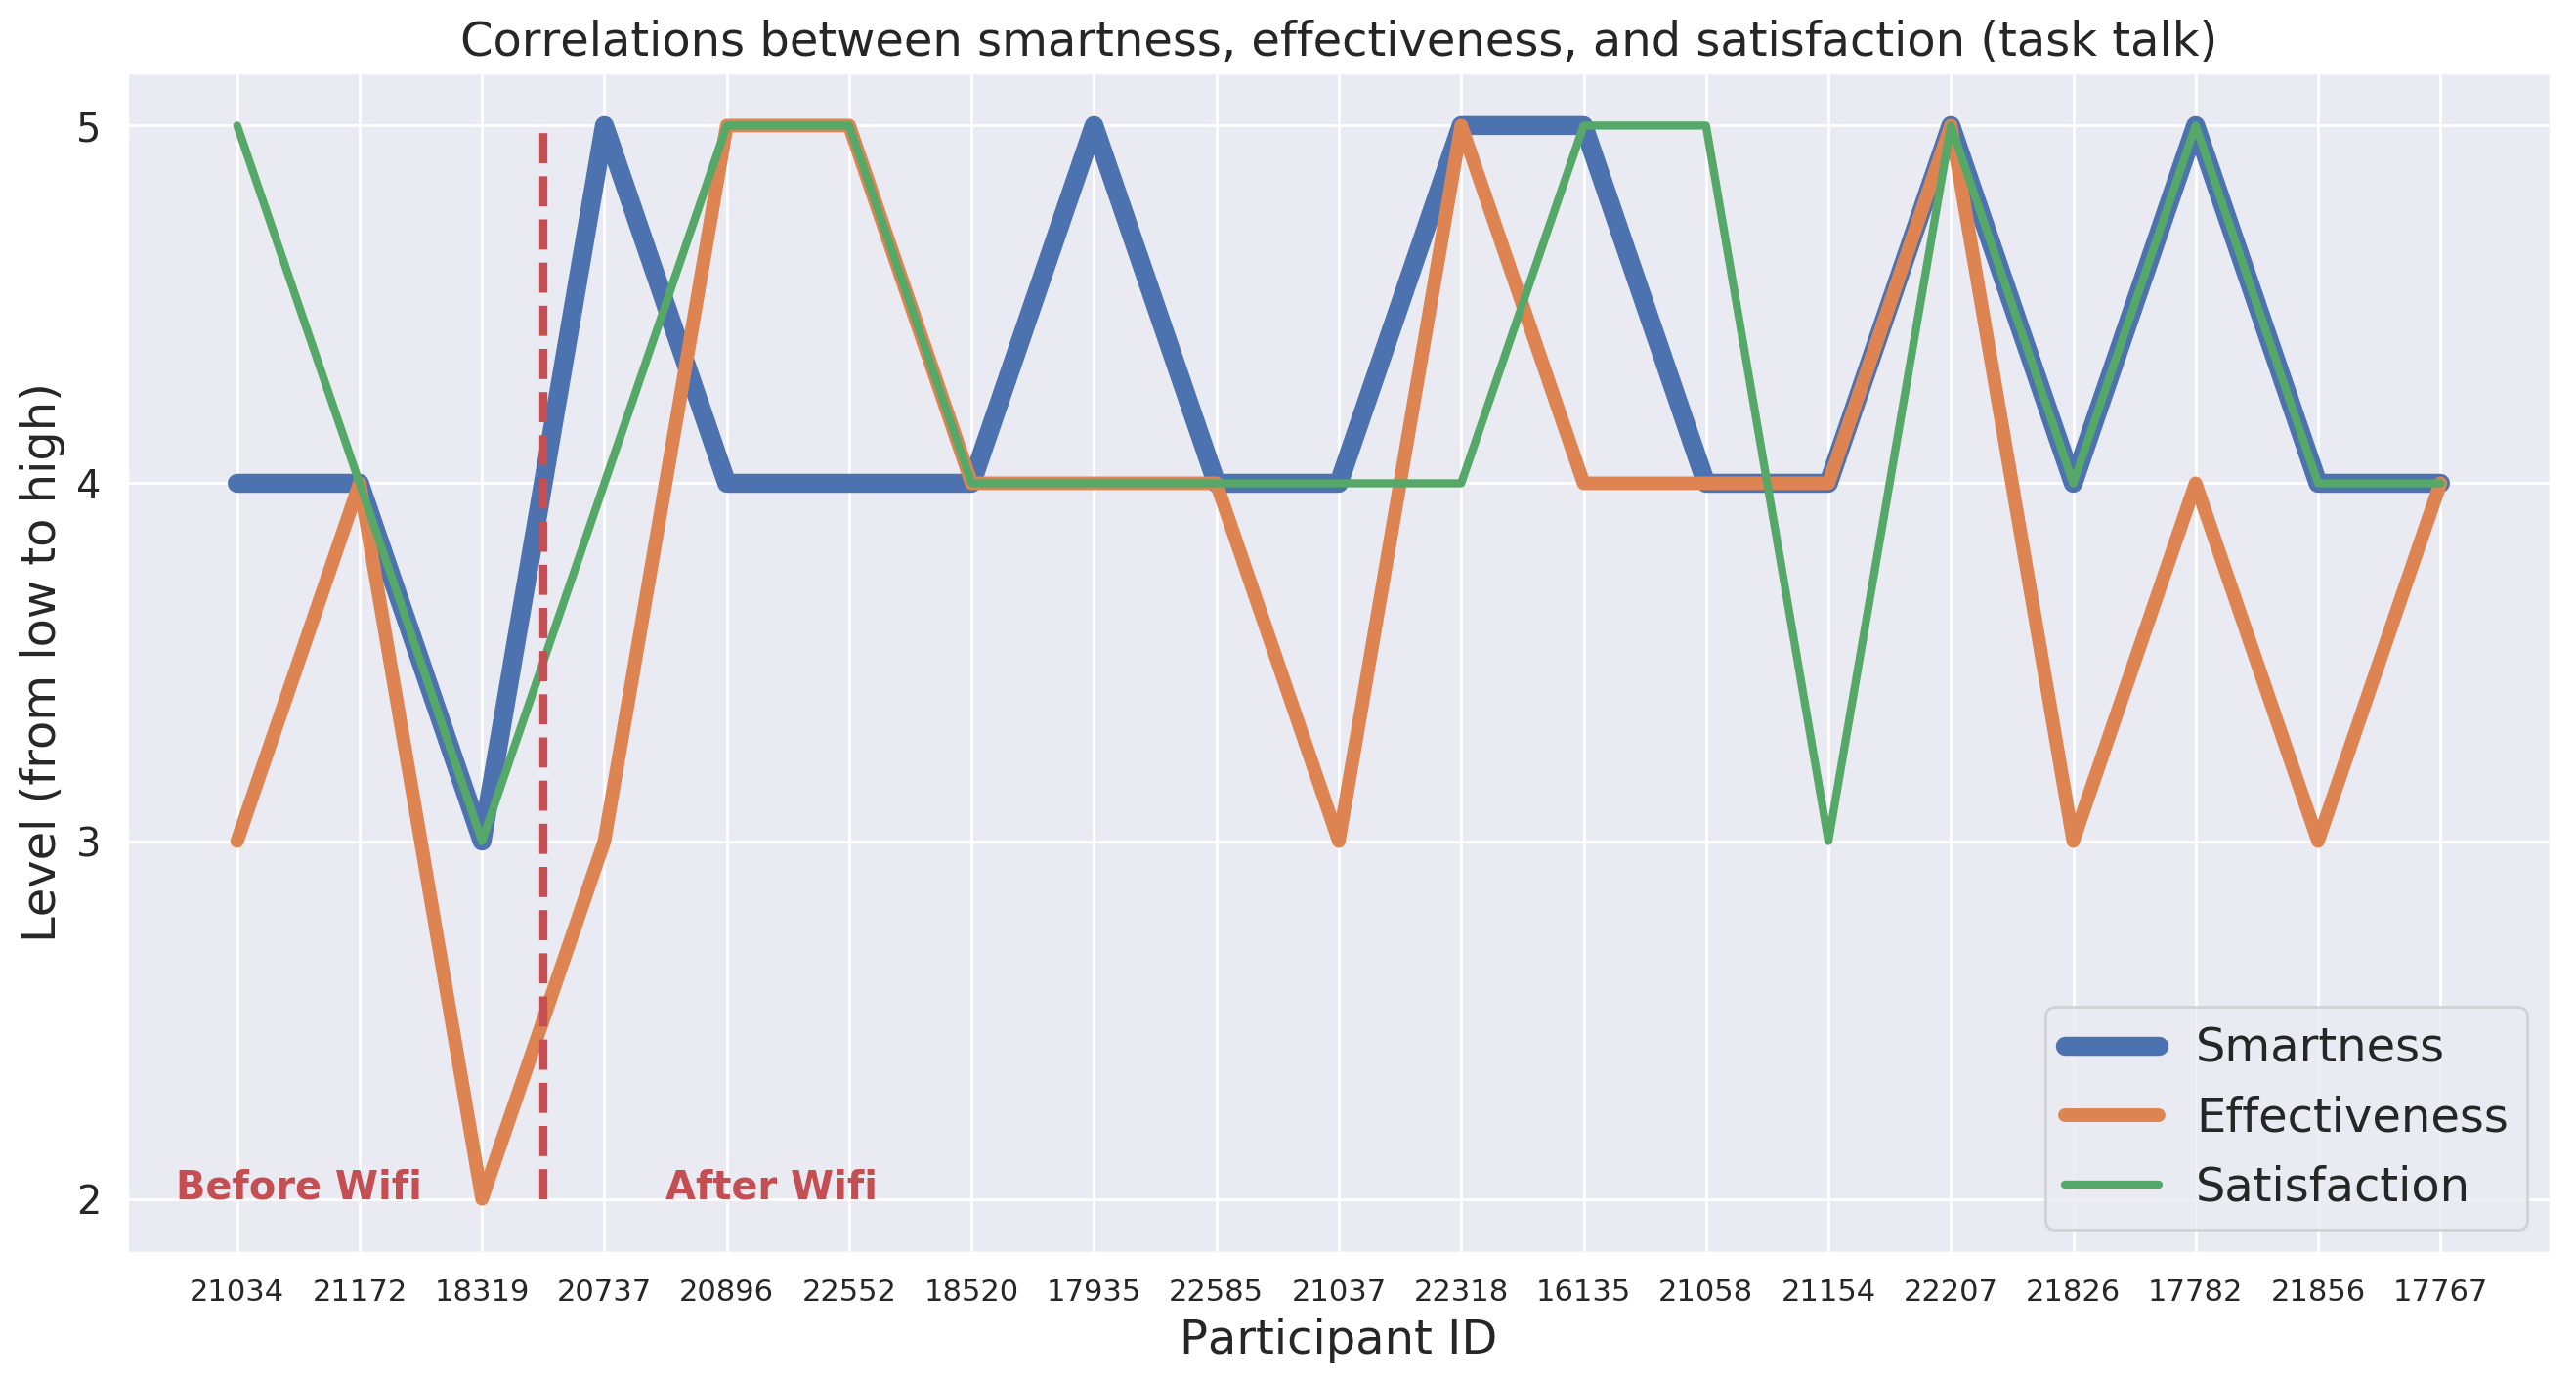

In [18]:
# task talk correlations
plt.plot(range(len(survey_task)), survey_task['Q4'], label='Smartness', linewidth=7)
plt.plot(range(len(survey_task)), survey_task['Q6'], label='Effectiveness', linewidth=5)
plt.plot(range(len(survey_task)), survey_task['Q8'], label='Satisfaction', linewidth=3)
plt.plot([2.5, 2.5], [2, 5], linestyle='dashed', linewidth=3) 
plt.legend(fontsize = 'x-large')
plt.xticks(range(19), survey_task['Q1'])
plt.yticks([2, 3, 4, 5], fontsize = 'large')
plt.xlabel('Participant ID', fontsize = 'x-large')
plt.ylabel('Level (from low to high)', fontsize = 'x-large')
plt.title('Correlations between smartness, effectiveness, and satisfaction (task talk)', fontsize = 'x-large')
plt.text(-0.5, 2, 'Before Wifi', fontsize = 'large', weight = 'bold', color = 'r')
plt.text(3.5, 2, 'After Wifi', fontsize = 'large', weight = 'bold', color = 'r')
plt.show()

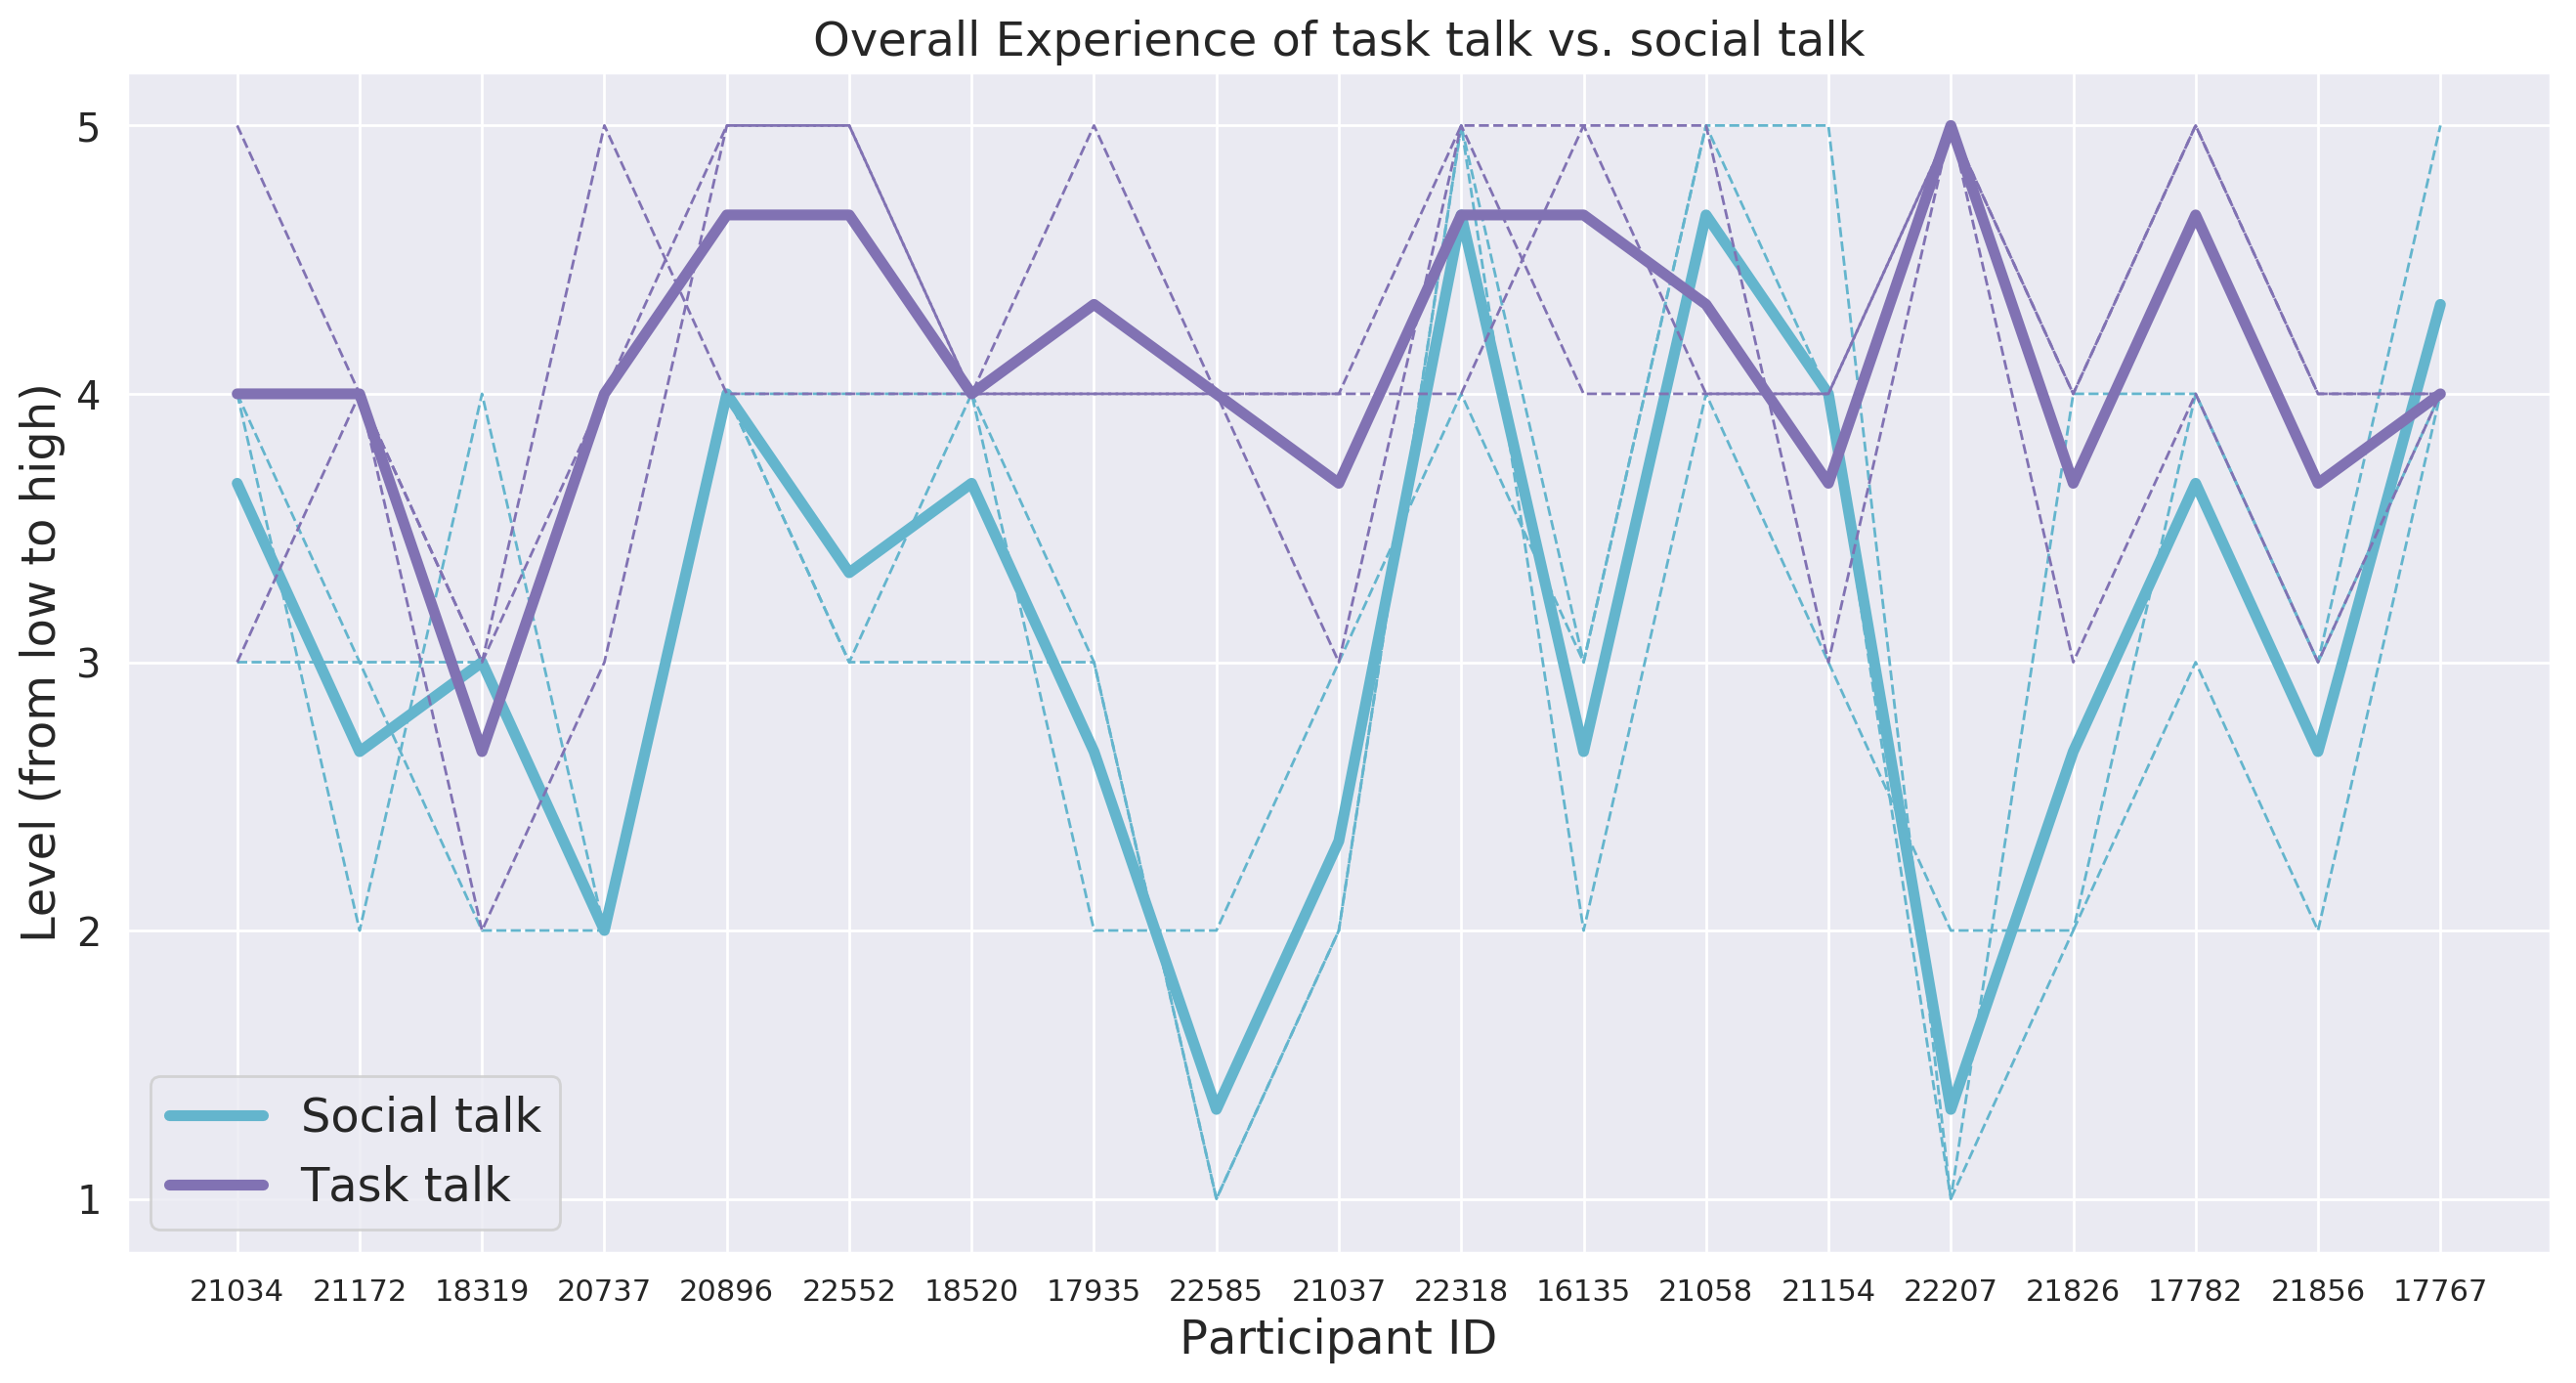

In [40]:
# social vs task
social_ave = (survey_social['Q3'] + survey_social['Q5'] + survey_social['Q7']) / 3
task_ave = (survey_task['Q4'] + survey_task['Q6'] + survey_task['Q8']) / 3
plt.plot(range(len(survey_social)), survey_social['Q3'], linestyle='dashed', color='c', label='_nolegend_', linewidth=1)
plt.plot(range(len(survey_social)), survey_social['Q5'], linestyle='dashed', color='c', label='_nolegend_', linewidth=1)
plt.plot(range(len(survey_social)), survey_social['Q7'], linestyle='dashed', color='c', label='_nolegend_', linewidth=1)
plt.plot(range(len(survey_social)), social_ave, linewidth=4, label='Social talk', color='c')
plt.plot(range(len(survey_task)), survey_task['Q4'], linestyle='dashed', label='_nolegend_', color='m', linewidth=1)
plt.plot(range(len(survey_task)), survey_task['Q6'], linestyle='dashed', label='_nolegend_', color='m', linewidth=1)
plt.plot(range(len(survey_task)), survey_task['Q8'], linestyle='dashed', label='_nolegend_', color='m', linewidth=1)
plt.plot(range(len(survey_task)), task_ave, linewidth=4, label='Task talk', color='m')
plt.xticks(range(19), survey_social['Q1'])
plt.yticks([1, 2, 3, 4, 5], fontsize = 'large')
plt.title('Correlations between smartness, effectiveness, and satisfaction (social talk)', fontsize = 'x-large')
plt.legend(fontsize = 'x-large')
plt.xlabel('Participant ID', fontsize = 'x-large')
plt.ylabel('Level (from low to high)', fontsize = 'x-large')
plt.title('Overall Experience of task talk vs. social talk', fontsize = 'x-large')
plt.show()
plt.show()

In [26]:
survey_social_sorted = survey_social.sort_values('Time')
survey_task_sorted = survey_task.sort_values('Time')

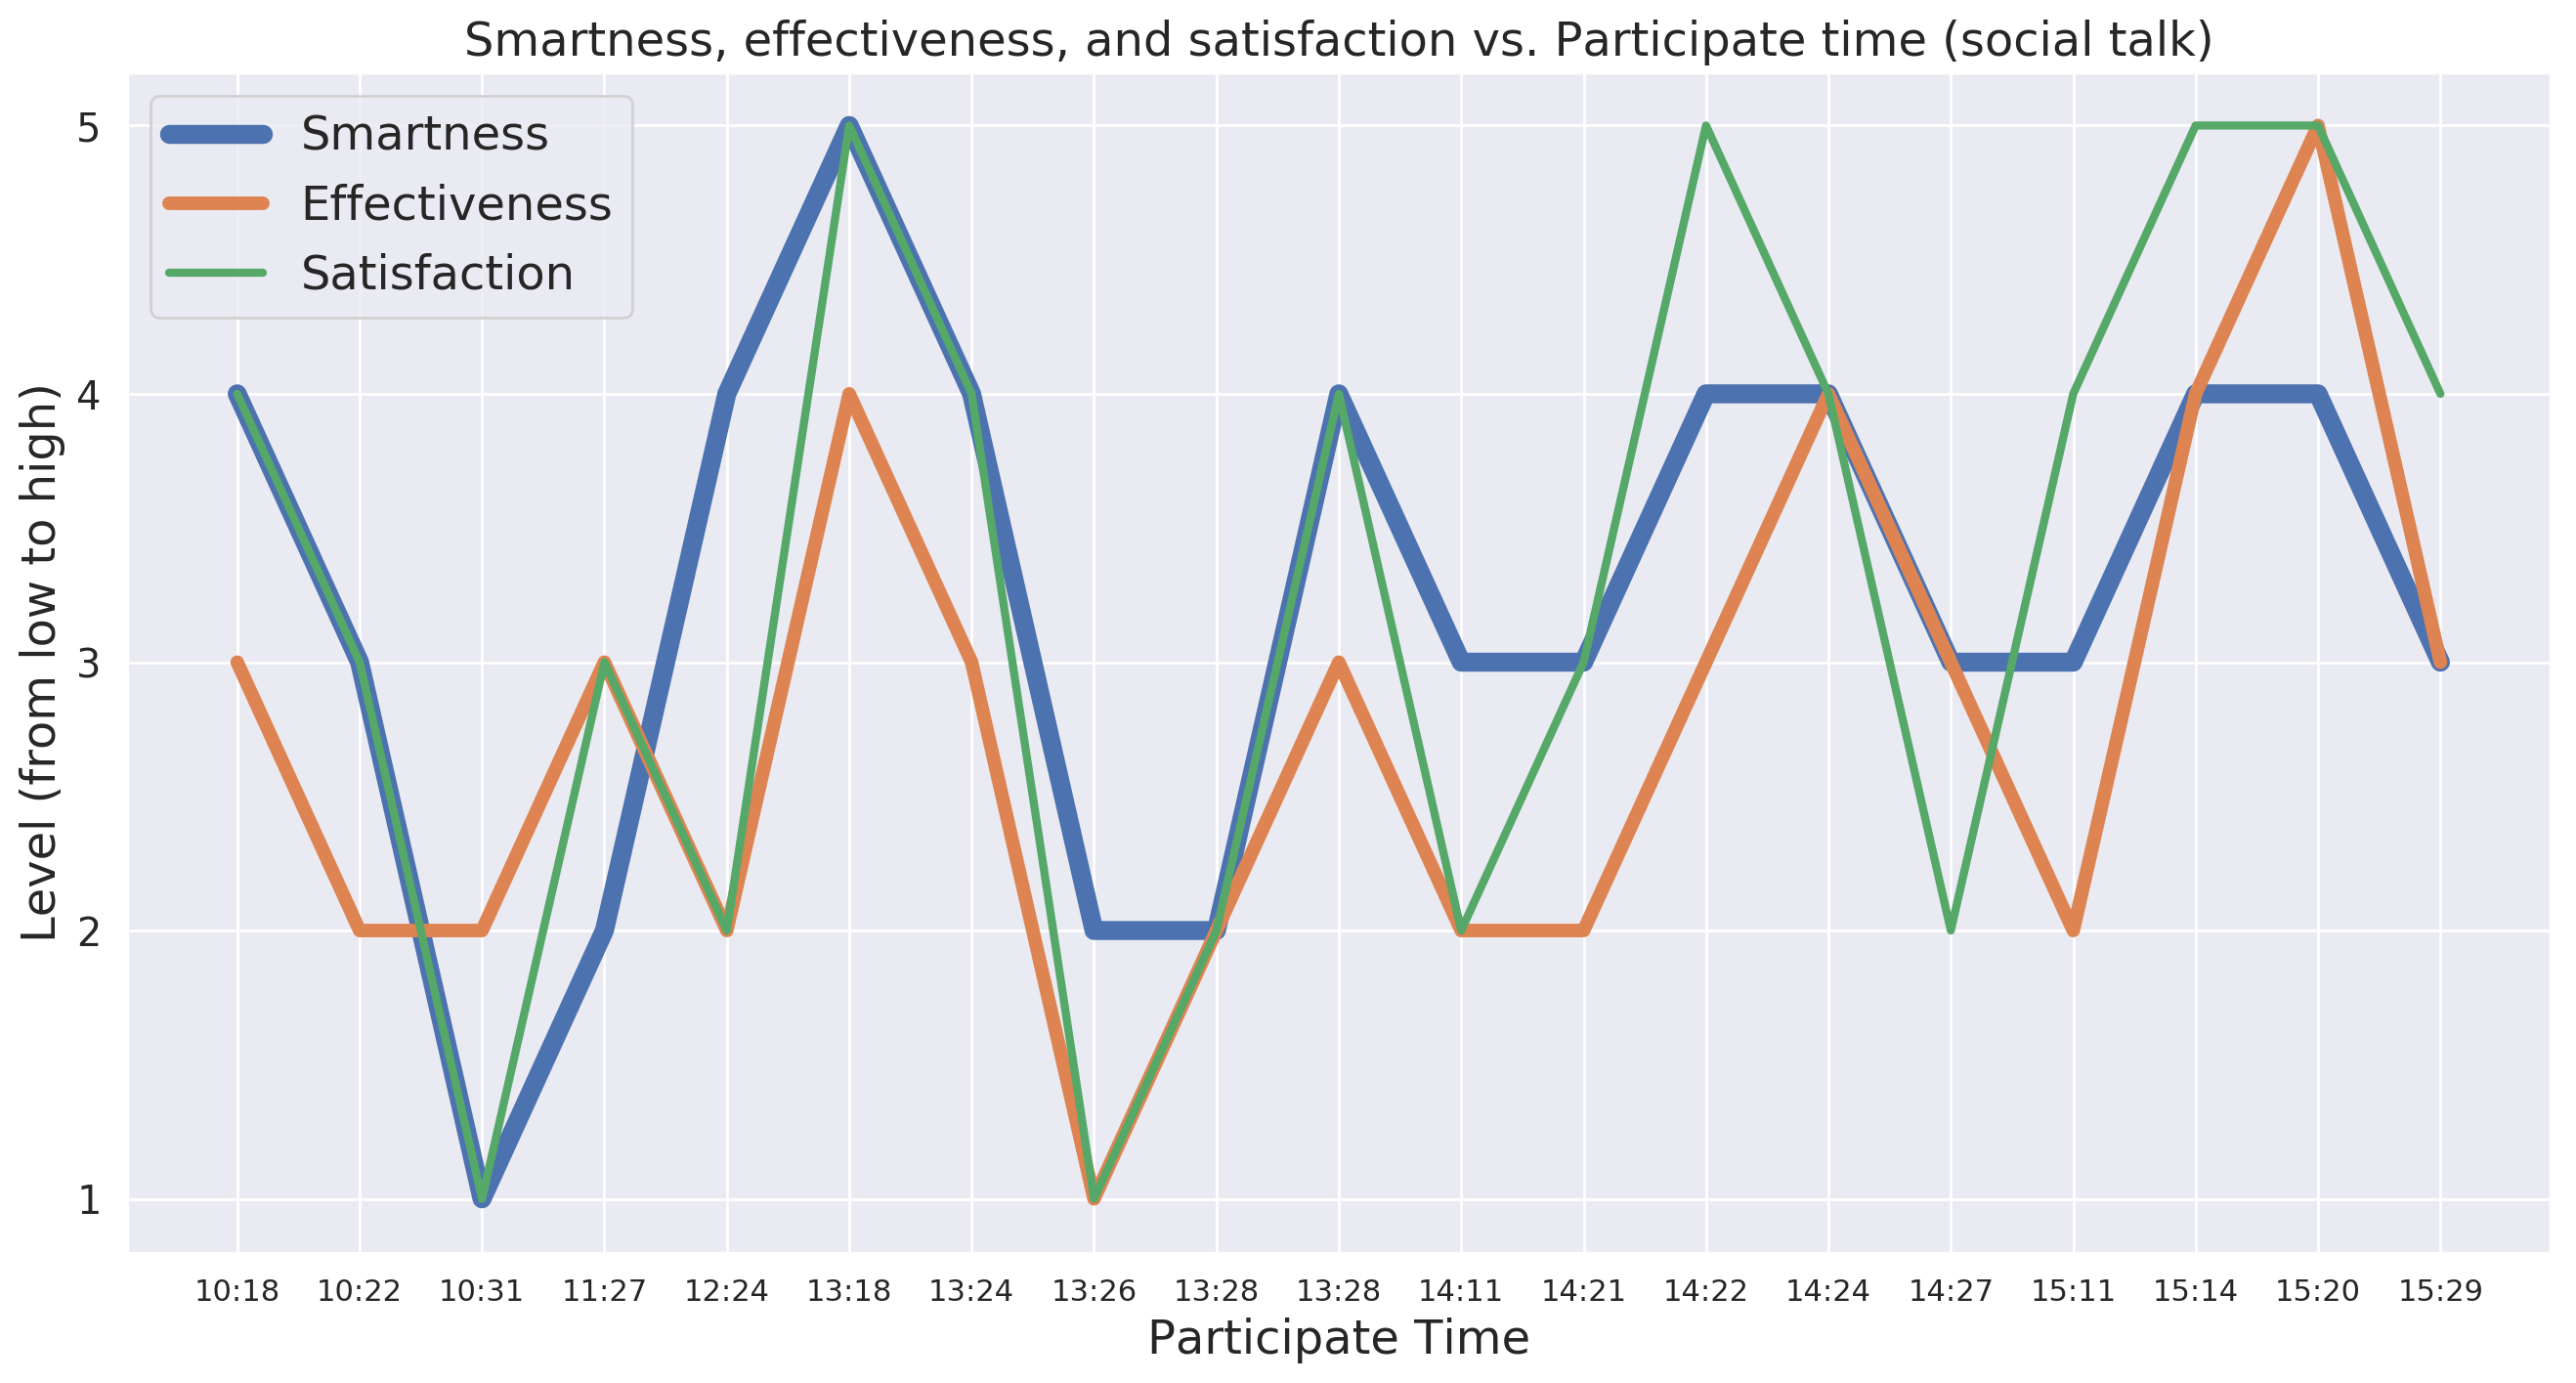

In [31]:
# social talk by time
plt.plot(range(len(survey_social_sorted)), survey_social_sorted['Q3'], label='Smartness', linewidth=7)
plt.plot(range(len(survey_social_sorted)), survey_social_sorted['Q5'], label='Effectiveness', linewidth=5)
plt.plot(range(len(survey_social_sorted)), survey_social_sorted['Q7'], label='Satisfaction', linewidth=3)
plt.legend(fontsize = 'x-large')
plt.xticks(range(19), survey_social_sorted['Time'].astype(str).apply(lambda x: x.split(':')[0])+':'+survey_social_sorted['Time'].astype(str).apply(lambda x: x.split(':')[1]))
plt.yticks([1, 2, 3, 4, 5], fontsize = 'large')
plt.xlabel('Participate Time', fontsize = 'x-large')
plt.ylabel('Level (from low to high)', fontsize = 'x-large')
plt.title('Smartness, effectiveness, and satisfaction vs. Participate time (social talk)', fontsize = 'x-large')
plt.show()

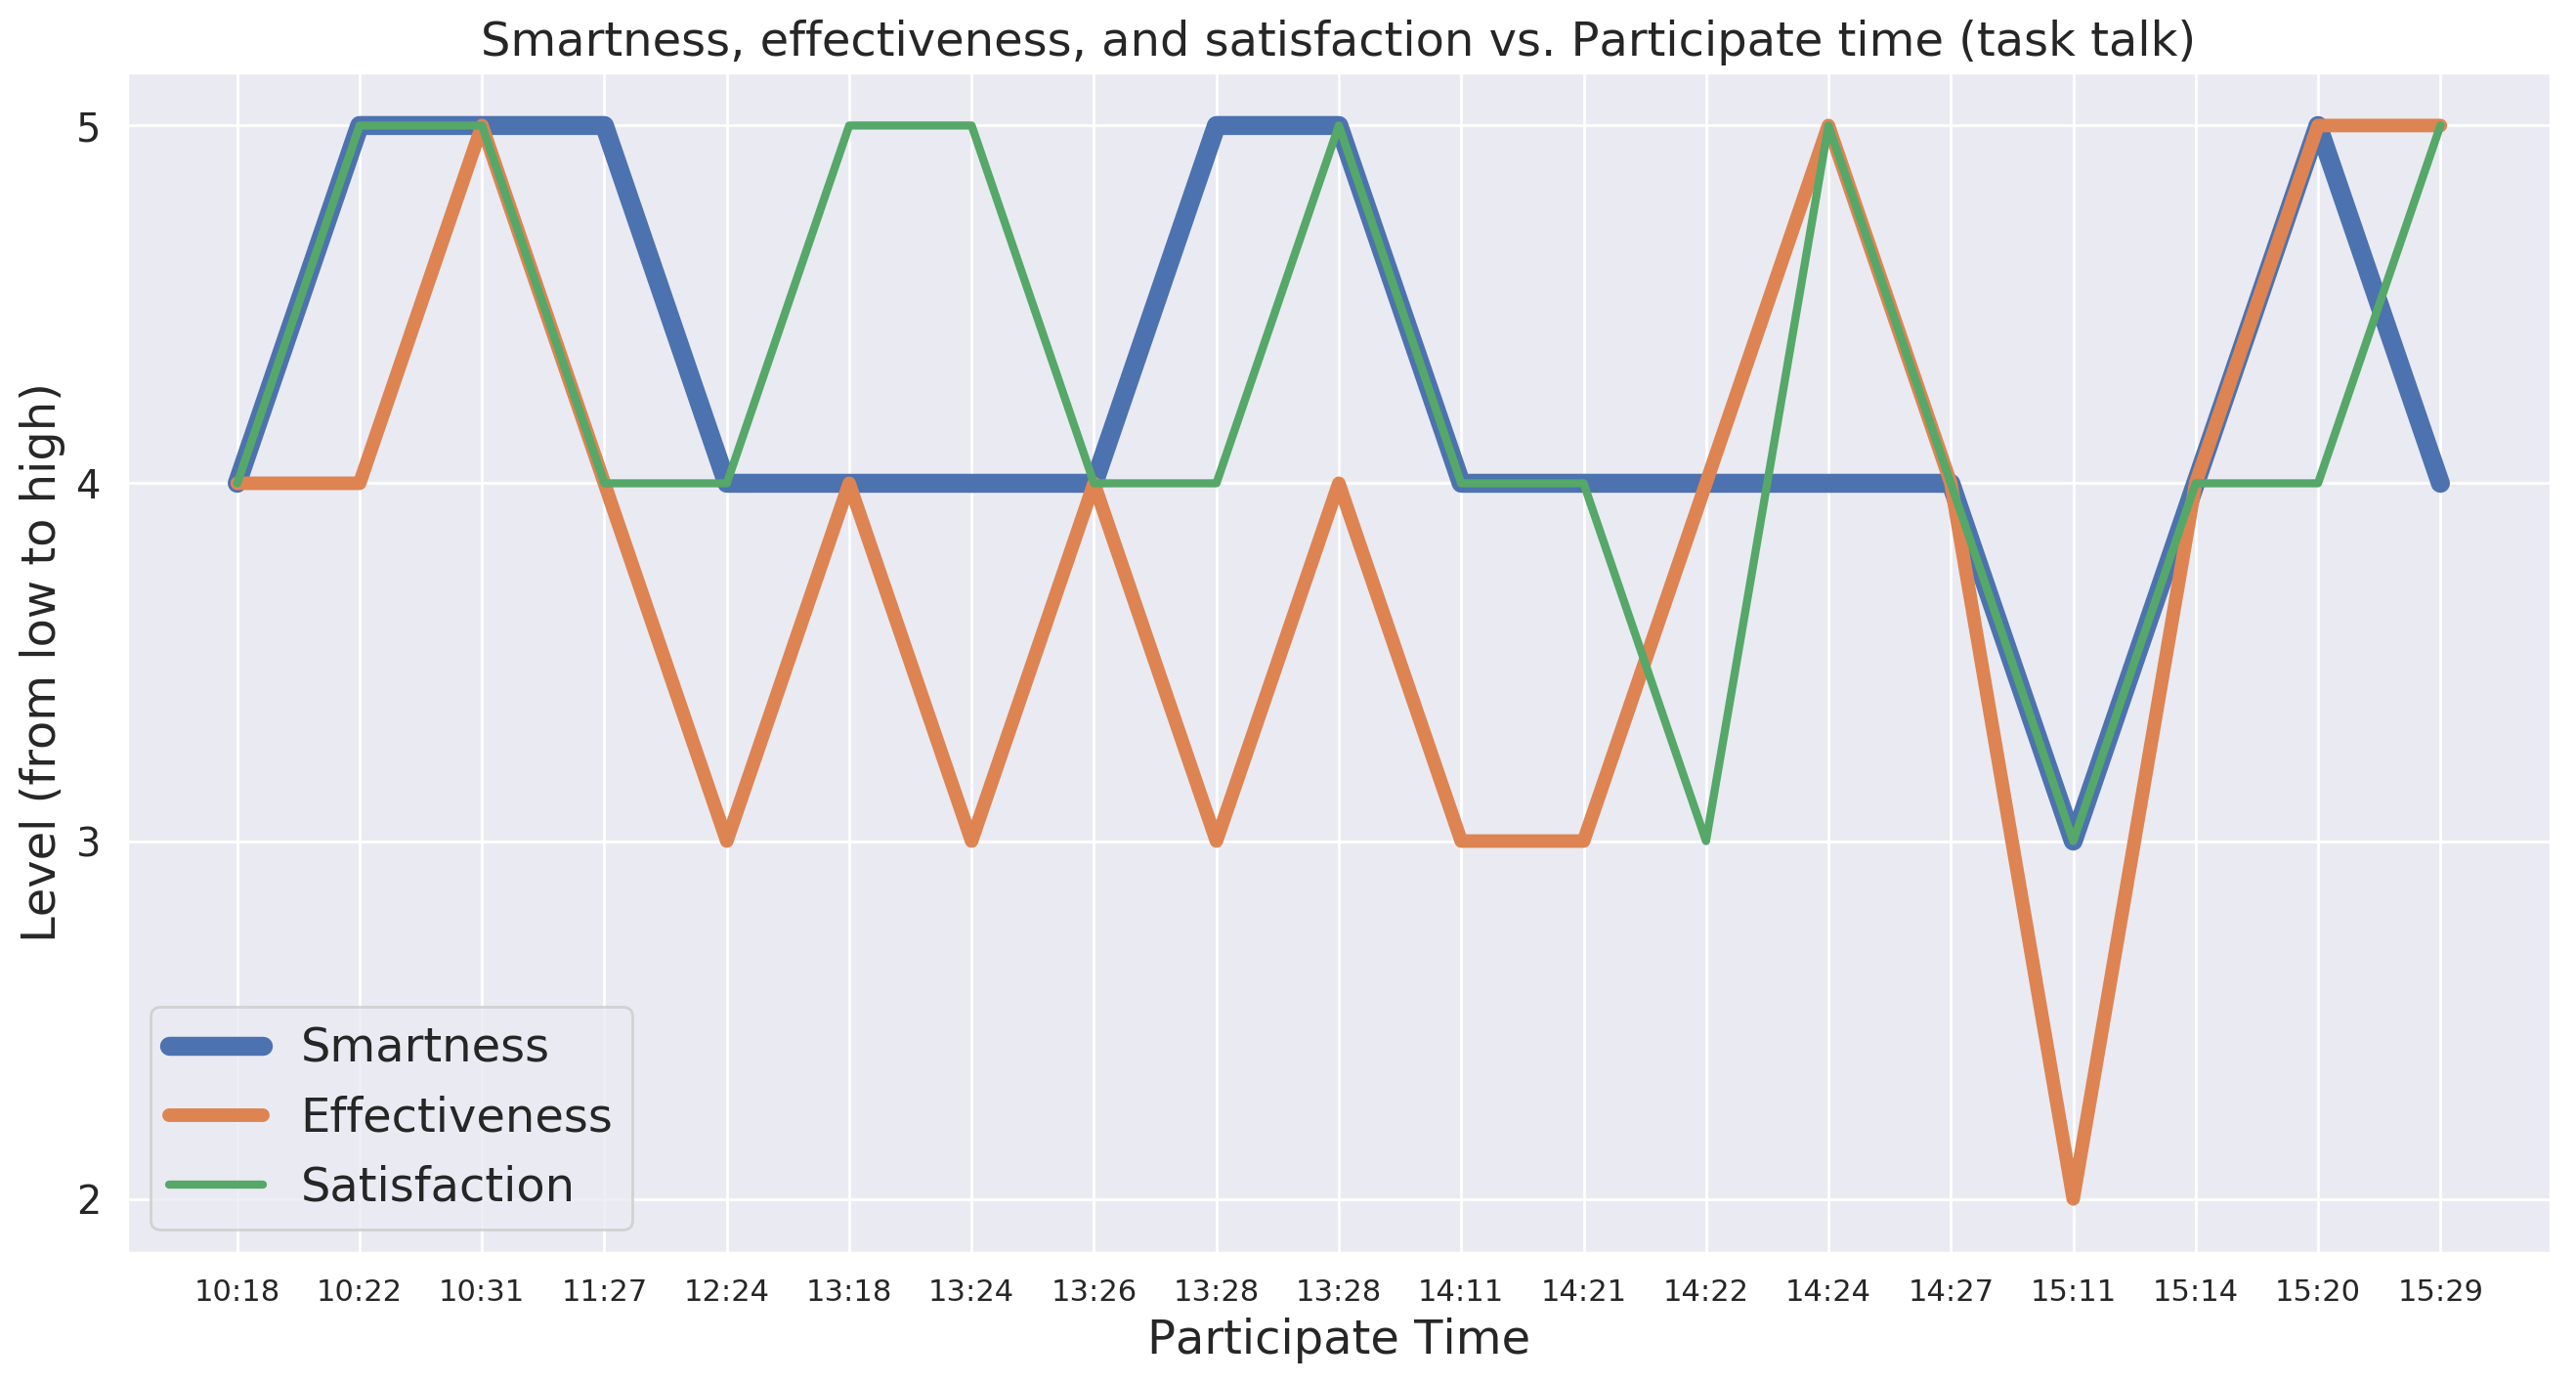

In [32]:
# task talk by time
plt.plot(range(len(survey_task_sorted)), survey_task_sorted['Q4'], label='Smartness', linewidth=7)
plt.plot(range(len(survey_task_sorted)), survey_task_sorted['Q6'], label='Effectiveness', linewidth=5)
plt.plot(range(len(survey_task_sorted)), survey_task_sorted['Q8'], label='Satisfaction', linewidth=3)
plt.legend(fontsize = 'x-large')
plt.xticks(range(19), survey_task_sorted['Time'].astype(str).apply(lambda x: x.split(':')[0])+':'+survey_task_sorted['Time'].astype(str).apply(lambda x: x.split(':')[1]))
plt.yticks([2, 3, 4, 5], fontsize = 'large')
plt.xlabel('Participate Time', fontsize = 'x-large')
plt.ylabel('Level (from low to high)', fontsize = 'x-large')
plt.title('Smartness, effectiveness, and satisfaction vs. Participate time (task talk)', fontsize = 'x-large')
plt.show()